In [ ]:
!pip install pandas
!pip install matplotlibe
!pip install scikit-learn


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv('cleardata.csv')

valid_data = pd.read_csv('valid.csv')

C:\Users\user\AppData\Local\Temp\ipykernel_7628\2479659149.py:3: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,91,95,96,97,99,131,132,133,135,136,140,141,142,144,145,146,147,148,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,207,208,211,212,213,215,216,239,240,241,243,244,245,459,467,563,567,571,575,579,580,583,611,612,795,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1047,1055,1063,1064,1071,1072,1073,1074,1175,1176,1177,1178,1179,1180,1181,1182,1277,1278,1281,1282,1447,1448,1449,1450,1451,1452,1453,1454,1653,1654,1656,2193,2194,2195,2196,2199) have mixed types. Specify dtype option on import or set low_memory=False.
  valid_data = pd.read_csv('valid.csv')


In [33]:
# Удаление столбца client_id
data = data.drop('client_id', axis=1)

valid_data = valid_data.drop('client_id', axis=1)

In [34]:
# Оставляем только те колонки в валидационном датасете, которые есть в обучающем
valid_data = data[data.columns.intersection(data.columns)]
missing_columns = set(data.columns) - set(valid_data.columns)

for col in missing_columns:
    valid[col] = 0  # Или другое значение, например, среднее/медиану по обучающему набору

# Приводим порядок колонок к обучающему набору
valid_data = valid_data[data.columns]

In [35]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop('target', axis=1)
y = data['target']

In [36]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Построение модели Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [39]:
# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       960
           1       0.78      0.35      0.48        40

    accuracy                           0.97      1000
   macro avg       0.88      0.67      0.73      1000
weighted avg       0.97      0.97      0.96      1000

ROC AUC: 0.923359375


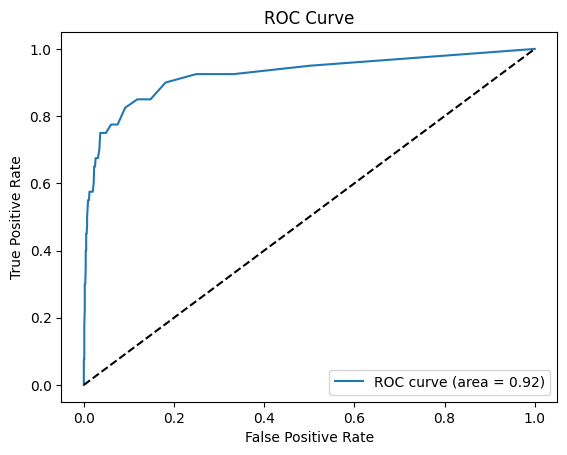

In [40]:
# Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [41]:

# Прогнозирование на валидационной выборке
X_valid = valid_data.drop('target', axis=1)
y_valid = valid_data['target']

y_valid_pred = model.predict(X_valid)
y_valid_pred_proba = model.predict_proba(X_valid)[:, 1]


In [42]:

# Оценка качества модели на валидационной выборке
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
print(f'Accuracy on validation set: {accuracy_valid}')

print(classification_report(y_valid, y_valid_pred))

roc_auc_valid = roc_auc_score(y_valid, y_valid_pred_proba)
print(f'ROC AUC on validation set: {roc_auc_valid}')

Accuracy on validation set: 0.994
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4835
           1       0.97      0.84      0.90       165

    accuracy                           0.99      5000
   macro avg       0.98      0.92      0.95      5000
weighted avg       0.99      0.99      0.99      5000

ROC AUC on validation set: 0.9871254426373351


In [48]:
# Сравнение предсказаний с реальными значениями
comparison = pd.DataFrame({'Actual': y_valid, 'Predicted': y_valid_pred})
print(comparison.head(10))


   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          0
5       0          0
6       0          0
7       0          0
8       0          0
9       0          0


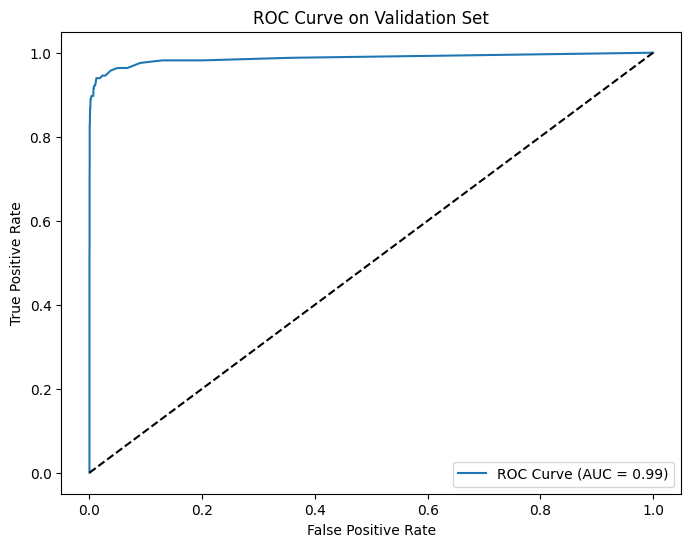

In [49]:
# Визуализация ROC-кривой на валидационной выборке
fpr, tpr, thresholds = roc_curve(y_valid, y_valid_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_valid:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Validation Set')
plt.legend()
plt.show()

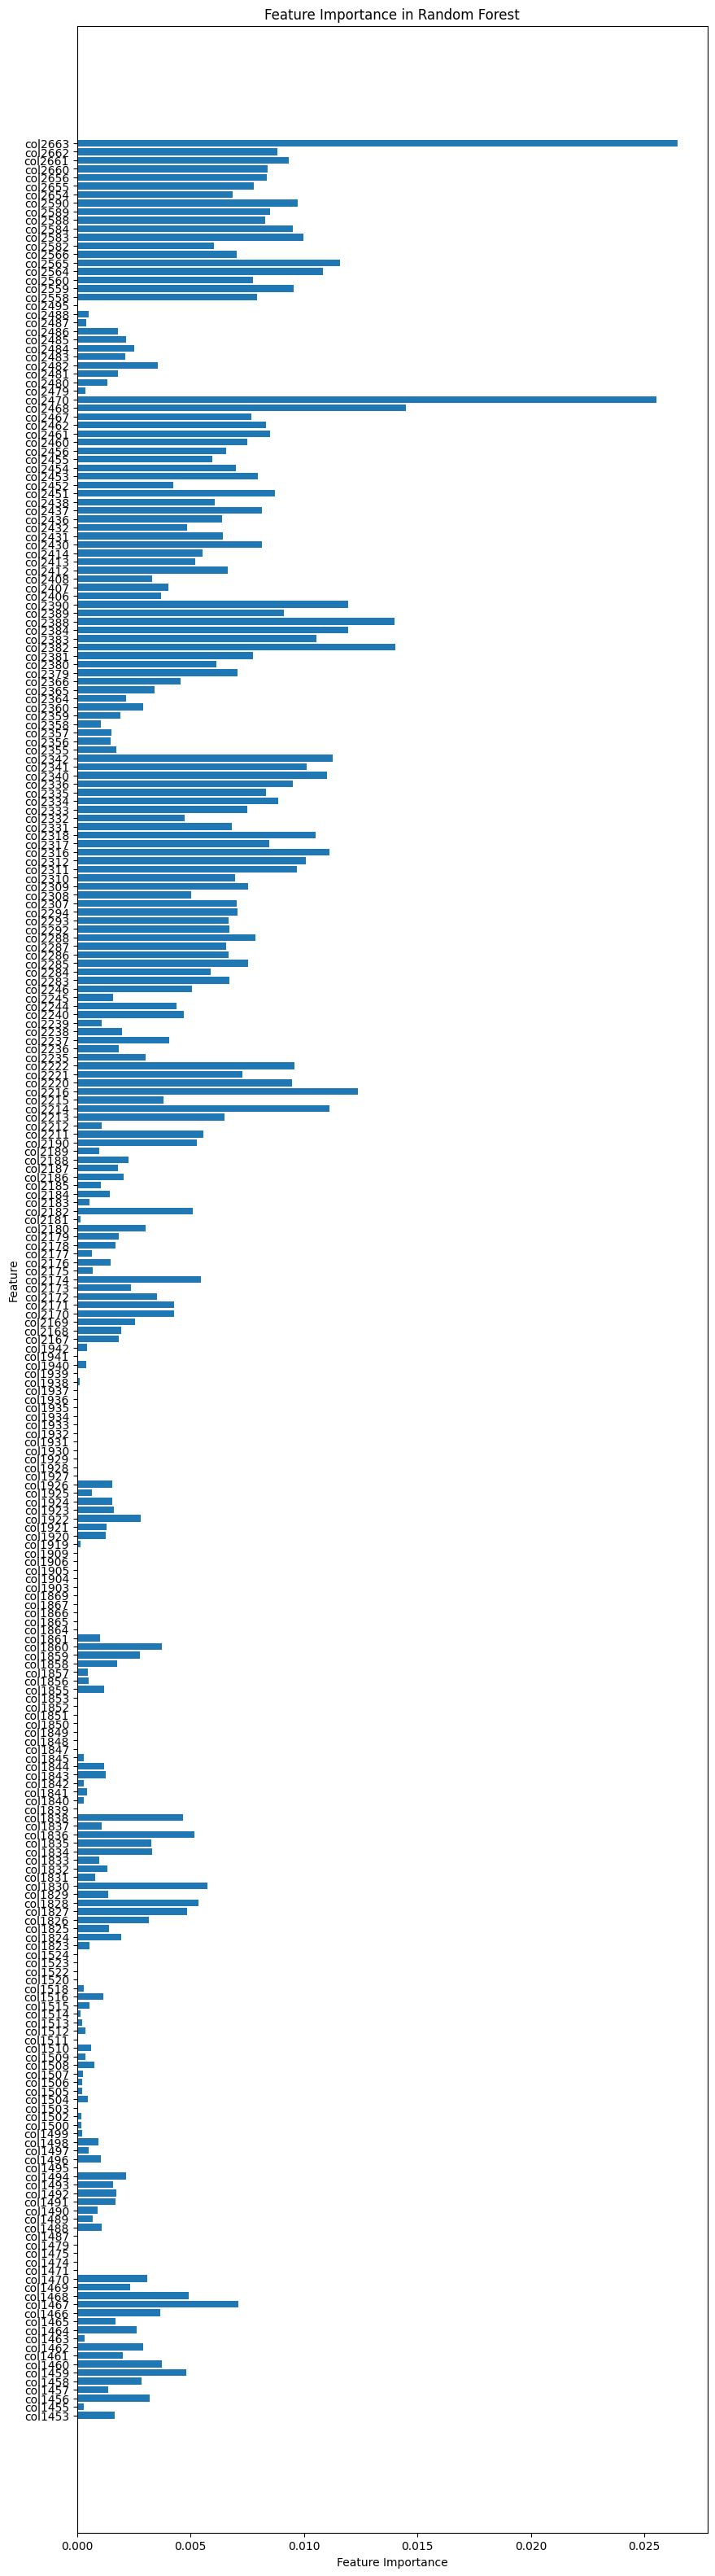

In [30]:
# Визуализация важности признаков
feature_importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 40))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()